In [1]:
#Loading Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading data
c_data=pd.read_csv('client_data.csv')
p_data=pd.read_csv('price_data.csv')

In [3]:
c_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
c_data.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [5]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
c_data.shape

(14606, 26)

In [7]:
#Missing values in client data set
c_data.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

There are no missing values in the c_data.

In [8]:
p_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [9]:
p_data.shape

(193002, 8)

In [10]:
p_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [11]:
#Missing Values in p_dataset.
p_data.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

No missing values is found in the p_data.

In [12]:
p_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


Based on the statistics data we can conclude as follows :

The average price of energy for the 1st period is $0.14

The average price of energy for the 2st period is $0.05

The average price of energy for the 3st period is $0.03

The average price of power for the 1st period is $43.33

The average price of power for the 2st period is $10.62

The average price of power for the 3st period is $6.40



In [13]:
#Duplicates
p_data.drop_duplicates()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [14]:
#Converting Date feature of client data
c_data[['date_activ','date_end','date_modif_prod','date_renewal']]=c_data[['date_activ','date_end','date_modif_prod','date_renewal']].apply(pd.to_datetime)


In [15]:
#Converting Date feature of price data
p_data[['price_date']]=p_data[['price_date']].apply(pd.to_datetime)

In [16]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

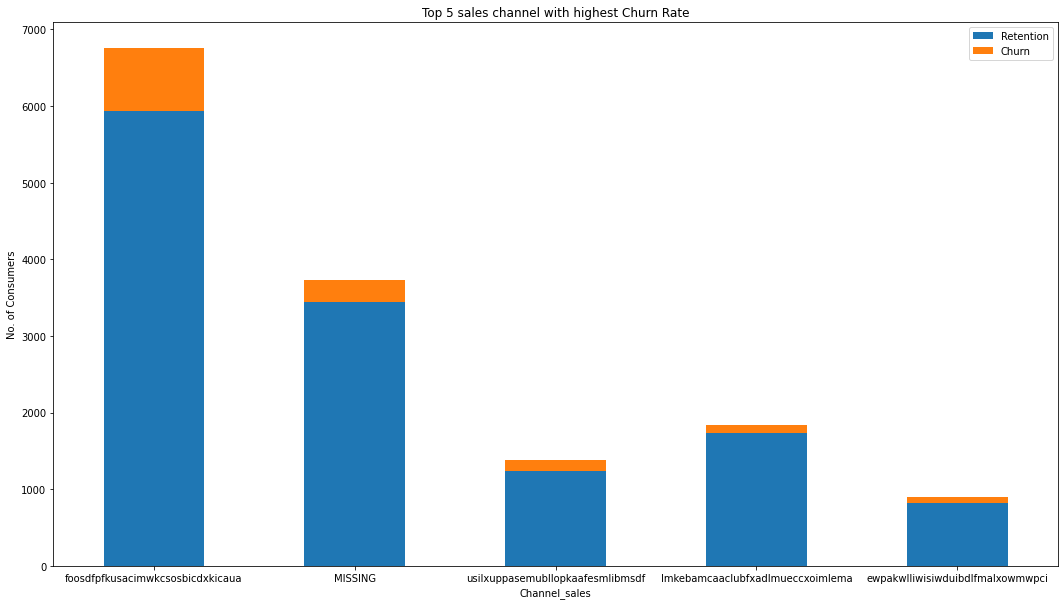

In [17]:
#Sales with Highest Churn Rate
sales = c_data[["channel_sales",
               "churn", "id"]].groupby([
    "channel_sales","churn"])["id"].count().unstack(level=1).sort_values(by=[1],ascending=False)[:5]
sales_percentage = (sales.div(sales.sum(axis=1), axis=0)*100)
sales.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Top 5 sales channel with highest Churn Rate")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("Channel_sales")
plt.show()


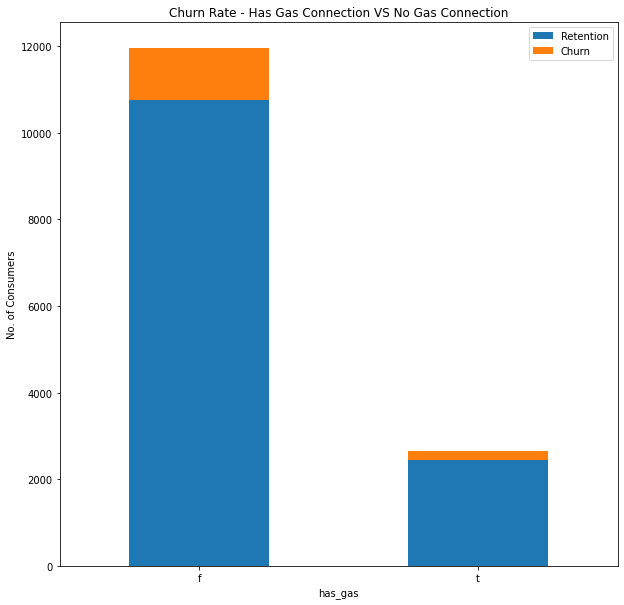

In [18]:
cons_12m = c_data[["has_gas",
               "churn", "id"]].groupby([
    "has_gas","churn"])["id"].count().unstack(level=1).sort_values(by=[1],ascending=False)
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0)*100)
cons_12m.plot(kind="bar",
 figsize=(10,10),
 stacked=True,
rot=0,
 title= "Churn Rate - Has Gas Connection VS No Gas Connection")

# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("has_gas")
plt.show()

<AxesSubplot:xlabel='churn', ylabel='count'>

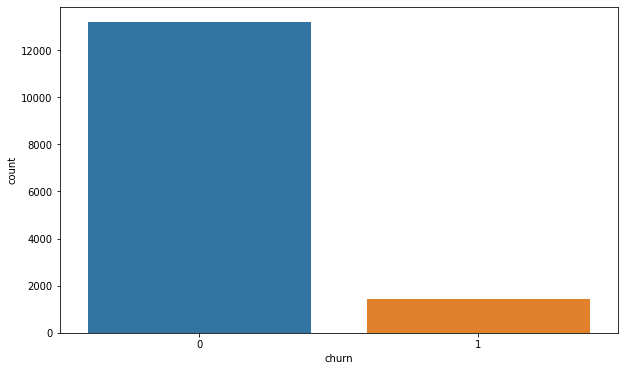

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='churn',data=c_data)

<AxesSubplot:>

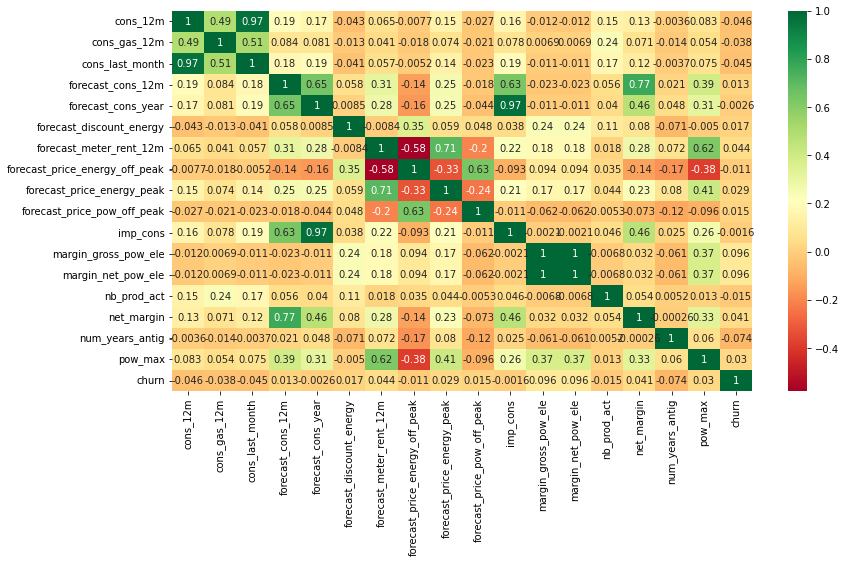

In [20]:
corr=c_data.corr()
plt.figure(figsize=(13,7))
sns.heatmap(corr,cmap='RdYlGn',annot=True)

In [21]:
c_data['contract_tenure']=c_data['date_end']-c_data['date_activ']
c_data['contract_tenure']=c_data['contract_tenure'].apply(lambda x:x.days)

In [22]:
c_data['contract_tenure_year']=c_data['contract_tenure'].apply(lambda x:int(np.round(x/365)))

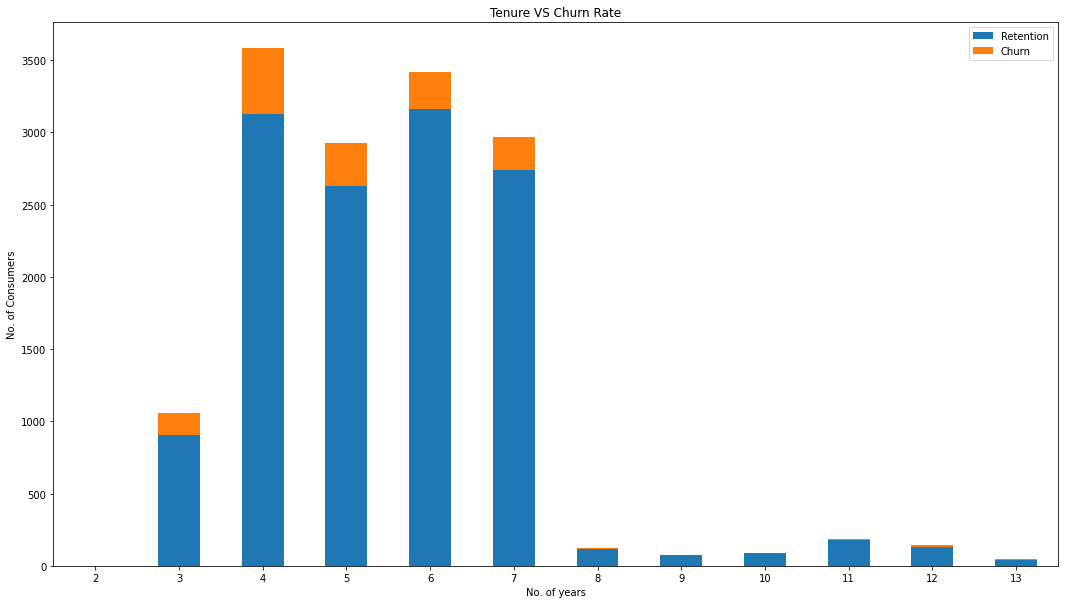

In [23]:
tenure = c_data[["contract_tenure_year", "churn", "id"]].groupby(["contract_tenure_year",
                                                                 "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)
tenure.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Tenure VS Churn Rate")

# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("No. of years")
plt.show()

We can clearly see that churn is very low for companies which joined recently or that have made the contract a long time ago. With the higher number ofchurners within the 3-7 years of tenure.

FEATURE ENGINEERNING

In [24]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [25]:
c_data['has_gas']=c_data['has_gas'].replace(('t','f'),(0,1))

In [26]:
c_data['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [27]:
c_data['origin_up']=c_data['origin_up'].replace(('lxidpiddsbxsbosboudacockeimpuepw','kamkkxfxxuwbdslkwifmmcsiusiuosws','ldkssxwpmemidmecebumciepifcamkci','MISSING','usapbepcfoloekilkwsdiboslwaxobdp','ewxeelcelemmiwuafmddpobolfuxioce'),(1,2,3,4,5,6))

In [28]:
c_data['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [29]:
c_data['channel_sales']=c_data['channel_sales'].replace(('foosdfpfkusacimwkcsosbicdxkicaua','MISSING','lmkebamcaaclubfxadlmueccxoimlema','usilxuppasemubllopkaafesmlibmsdf','ewpakwlliwisiwduibdlfmalxowmwpci','sddiedcslfslkckwlfkdpoeeailfpeds','epumfxlbckeskwekxbiuasklxalciiuu','fixdbufsefwooaasfcxdxadsiekoceaa'),(1,2,3,4,5,6,7,8))

In [30]:
c_data.shape


(14606, 28)

In [31]:
p_data.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [32]:
p_data['price_p1']=p_data['price_off_peak_var']+p_data['price_off_peak_fix']
p_data['price_p2']=p_data['price_peak_var']+p_data['price_peak_fix']
p_data['price_p3']=p_data['price_mid_peak_var']+p_data['price_mid_peak_fix']
p_data['pp12']=p_data['price_p2']-p_data['price_p1']
p_data['pp23']=p_data['price_p3']-p_data['price_p2']
p_data['pp13']=p_data['price_p3']-p_data['price_p1']

In [33]:
p_data.drop(['price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],axis=1,inplace=True)

In [34]:
p_data.head()

,id,price_p1,price_p2,price_p3,pp12,pp23,pp13
0,038af19179925da21a25619c5a24b745,44.418298,0.0,0.0,-44.418298,0.0,-44.418298
1,038af19179925da21a25619c5a24b745,44.418298,0.0,0.0,-44.418298,0.0,-44.418298
2,038af19179925da21a25619c5a24b745,44.418298,0.0,0.0,-44.418298,0.0,-44.418298
3,038af19179925da21a25619c5a24b745,44.416557,0.0,0.0,-44.416557,0.0,-44.416557
4,038af19179925da21a25619c5a24b745,44.416557,0.0,0.0,-44.416557,0.0,-44.416557


In [35]:
p_data.shape

(193002, 7)

In [36]:
data=pd.merge(p_data,c_data, on=['id'])

In [37]:
data.drop(['id','date_activ', 'date_end', 'date_modif_prod', 'date_renewal'],axis=1,inplace=True)

In [38]:
data.shape

(175149, 29)

In [39]:
data.columns

Index(['price_p1', 'price_p2', 'price_p3', 'pp12', 'pp23', 'pp13',
       'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'contract_tenure', 'contract_tenure_year'],
      dtype='object')

In [40]:
data.fillna(0,inplace=True)

In [41]:
sample_data = data.sample(frac=0.1, random_state=22)
sample_data

,price_p1,price_p2,price_p3,pp12,pp23,pp13,channel_sales,cons_12m,cons_gas_12m,cons_last_month,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_tenure,contract_tenure_year
932,44.592310,0.000000,0.000000,-44.592310,0.000000,-44.592310,4,9968,33491,1389,...,19.28,19.28,2,141.31,3,1,13.200,0,1096,3
88483,44.588653,0.000000,0.000000,-44.588653,0.000000,-44.588653,6,7673,0,0,...,21.48,21.48,1,108.56,3,3,10.392,0,1019,3
121503,40.695413,24.446444,16.301393,-16.248970,-8.145051,-24.394021,1,3863,0,364,...,31.41,31.41,1,48.03,4,1,17.321,0,1461,4
142477,44.414913,0.000000,0.000000,-44.414913,0.000000,-44.414913,2,822,0,0,...,28.80,28.80,1,12.89,5,2,11.500,0,1826,5
125974,40.857099,24.542873,16.365110,-16.314226,-8.177763,-24.491989,1,37854,12741,5809,...,24.18,24.18,4,480.70,5,1,20.000,0,1827,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74036,40.688477,24.439508,16.294457,-16.248970,-8.145051,-24.394021,3,85992,0,5255,...,3.21,3.21,1,654.81,6,1,50.000,0,2364,6
24479,40.848801,24.539562,16.367812,-16.309239,-8.171750,-24.480989,5,1564610,0,184299,...,18.71,18.71,1,361.20,4,1,24.249,0,1460,4
155815,44.417522,0.000000,0.000000,-44.417522,0.000000,-44.417522,3,3007,5381,180,...,23.76,23.76,3,21.59,3,3,10.392,0,1096,3
169979,44.417142,0.000000,0.000000,-44.417142,0.000000,-44.417142,2,24962,0,1289,...,13.08,13.08,1,26.46,6,2,11.000,0,2526,7


In [42]:
#Spliting into X & Y
x=sample_data.drop('churn',axis=1)
y=sample_data.churn

In [43]:
x.shape

(17515, 28)

In [44]:
y.shape

(17515,)

In [45]:
x.columns

Index(['price_p1', 'price_p2', 'price_p3', 'pp12', 'pp23', 'pp13',
       'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'contract_tenure', 'contract_tenure_year'],
      dtype='object')

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=22)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(x_train)
scaled_X_test = scaler.transform(x_test)

In [48]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [49]:
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(22)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Accuracy'])
    model_scores = model_scores.transpose().sort_values('Accuracy')

    return model_scores

In [50]:
models={'SVC': SVC(),
        'DECISION TREE' : DecisionTreeClassifier(),
        'RANDOM FOREST' : RandomForestClassifier(),
        'GRADIENT BOOSTING': GradientBoostingClassifier(),
        'AdaBoost' : AdaBoostClassifier(),
        'XGBOOST' : XGBClassifier()}

In [51]:
baseline_model = fit_and_score(models, x_train, x_test, y_train, y_test)
baseline_model.sort_values('Accuracy')

C:\Users\ASUS\anaconda3\envs\envo\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:29:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy
AdaBoost,0.898382
SVC,0.898573
GRADIENT BOOSTING,0.901047
DECISION TREE,0.920266
XGBOOST,0.937583
RANDOM FOREST,0.939486


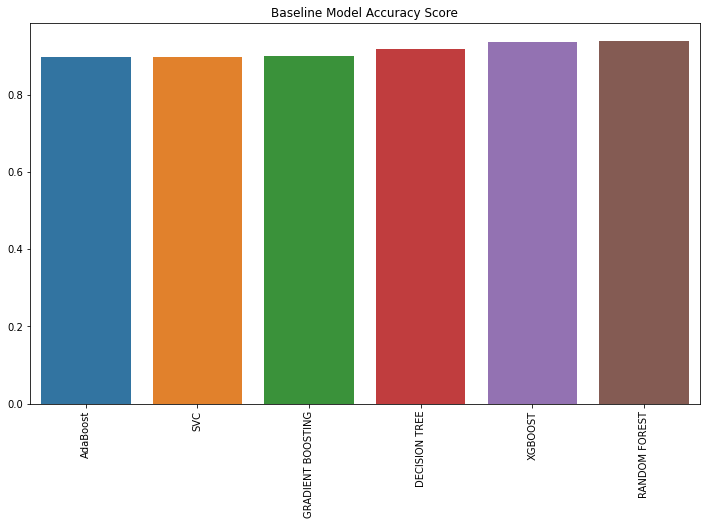

In [52]:
plt.figure(figsize=(12,7))
sns.barplot(data=baseline_model.T)
plt.title('Baseline Model Accuracy Score')
plt.xticks(rotation=90);

Model Building on Orignal Data 

In [53]:
#Spliting into X & Y
x=data.drop('churn',axis=1)
y=data.churn

In [54]:
x.columns

Index(['price_p1', 'price_p2', 'price_p3', 'pp12', 'pp23', 'pp13',
       'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'contract_tenure', 'contract_tenure_year'],
      dtype='object')

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=22)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(x_train)
scaled_X_test = scaler.transform(x_test)

C:\Users\ASUS\anaconda3\envs\envo\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:39:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy:  0.905003099409481
Testing Accuarcy:  0.9013226758016938
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     47310
           1       0.92      0.01      0.02      5235

    accuracy                           0.90     52545
   macro avg       0.91      0.51      0.48     52545
weighted avg       0.90      0.90      0.86     52545



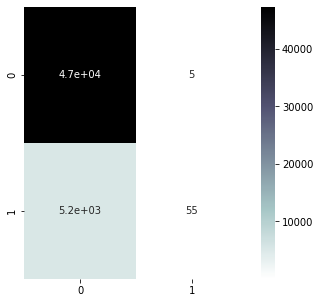

In [57]:
#Model Building
#XGBM
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model =xgb.XGBClassifier(random_state=22,n_estimators=100,max_depth=5,min_child_weight=1,gamma=0,learning_rate=0.01)
model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)
print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'bone_r')
plt.show()

XGBoost gives us 90% accuracy.